In [9]:
import pandas as pd
import pickle
#import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration

Load processed data:

In [10]:
presurvey = pd.read_pickle('./data/presurvey.pkl')
postsurvey = pd.read_pickle('./data/postsurvey.pkl')
with open('./data/presurvey_alias.pkl', 'rb') as handle:
    presurvey_alias = pickle.load(handle)
with open('./data/postsurvey_alias.pkl', 'rb') as handle:
    postsurvey_alias = pickle.load(handle)

In [11]:
presurvey
# this data include both the treatment and the control groups, as well as their chronicity and economic region

,timestamp_pre,id,freq_browser,freq_phone,length_use,freq_use,ability_find_tasks,promptly_find_tasks,text_search_preference,notification_preference,...,plugin_preference,current_country,home_country,only_one_country,education,gender,age,group,chronicity,region
0,1/13/2022 16:04:26,2aef4422f3276e44b1eea0c2a89374,5,2,7,5,3,3,4,4,...,NaN,Belarus,Belarus,Yes,Associate degree,Male,35-44 years old,treatment,Monochronic,global_south
1,1/13/2022 21:43:07,af2a7da96237f5baa54f6e67c1c0f1,5,5,1,5,5,4,4,5,...,NaN,United States,Mexico,Yes,Bachelor’s degree,Male,18-24 years old,treatment,Polychronic,global_south
2,1/14/2022 3:59:47,1cb48555a624b4c6fbe5e811271eb,5,3,5,3,4,3,4,5,...,NaN,Russia,Russia,Yes,"Some high school, no diploma",Male,25-34 years old,treatment,Monochronic,global_north
3,1/21/2022 11:27:52,8d87dd60d895e59dd459a6593144461,5,3,4,5,3,3,3,2,...,NaN,Philippines,Philippines,Yes,Bachelor’s degree,Male,25-34 years old,treatment,Monochronic,global_south
4,1/21/2022 16:18:18,e2f37f95c0b82dc037a56f768d591b1e,5,5,2,3,5,5,5,5,...,4.0,United States,United States,Yes,Bachelor’s degree,Male,18-24 years old,treatment,Monochronic,global_north
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2/22/2022 8:17:47,6c5c2140e325742bf4d7e9ac9969c41d,5,1,2,4,5,5,5,5,...,5.0,Kenya,United States,No,Bachelor’s degree,Female,25-34 years old,treatment,Monochronic,global_north
115,2/25/2022 13:43:11,e8a9c64d673a3c098e5ff4e22b1f3d,2,4,4,2,4,4,5,5,...,5.0,United States,United States,Yes,Trade/technical/vocational training,Female,35-44 years old,control,Monochronic,global_north
116,2/27/2022 9:47:48,531c3216dadbc742b6e21e582f6686a,5,3,3,5,5,5,5,5,...,4.0,United States,Brazil,No,Associate degree,Male,18-24 years old,treatment,Polychronic,global_south
117,3/20/2022 20:45:50,93b2e9904f38e821e7ba4948376f42a9,5,5,5,5,3,3,5,5,...,3.0,Russia,Russia,Yes,Associate degree,Male,35-44 years old,treatment,Monochronic,global_north


In [12]:
postsurvey

,timestamp_post,id,change_work,explain_change_work,create_new_work,explain_new_work,change_work_enjoyment,explain_change_work_enjoyment,create_new_experience,explain_new_experience,...,confidence_hard_task,attention_check,task_satisfaction_post,future_toloka_use,best_attempt_on_tokola,plugin_assistance,comment,group,chronicity,region
0,2/19/2022 13:08:36,518cd56975ccc59032da3137d845c6b,5,helps search tasks,5.0,it made me adjust my timing to complete tasks,5.0,finding convenient tasks,5.0,made interact more with toloka tasks,...,4.0,1.0,NaN,4.0,5.0,5.0,great plugin,control,Polychronic,global_south
1,2/20/2022 14:59:35,32ae306c14a39c07f685ea94adf6475,3,It didn't change how I work that much really b...,2.0,The plugin didn't really change my work schedu...,4.0,Since installing the plugin I felt more inclin...,4.0,I checked into Toloka more during the period t...,...,4.0,1.0,4.0,4.0,5.0,5.0,Enjoyed this project and I am currently enjoyi...,control,Monochronic,global_north
2,2/20/2022 15:08:31,7efc45e5132625d5314ddfc349384541,1,It didn't changed much of my work on Toloka. I...,1.0,I work on tasks whenever i want or when my fav...,3.0,I always enjoy my work on toloka but i Believe...,3.0,Not much. But i think it is good to have a plu...,...,3.0,NaN,NaN,5.0,5.0,2.0,It would be really helpful if there are a lot ...,control,Polychronic,global_south
3,2/20/2022 15:21:27,27fab4b7ccdc585dc35897de76e44a8c,4,I am satisfied with it but there should be a a...,4.0,It made me to remember to do the tasks,5.0,It engaged me more,5.0,It is good but it takes more time to load,...,4.0,1.0,4.0,4.0,5.0,4.0,Nice experience with the plugin but one thing ...,treatment,Polychronic,global_south
4,2/20/2022 15:23:55,86a36fbbe35a283dee16ff8280e5ed5,4,More tasks seemed available,4.0,Worked more in daytime,5.0,Created more success,4.0,General improvement in all areas,...,4.0,1.0,NaN,4.0,5.0,5.0,NaN,control,Monochronic,global_north
5,2/20/2022 15:35:22,6ecf5c6464172449bad6820af297e50,3,The plugin didn't change anything about my wor...,5.0,I complete any task that is available on Toluc...,3.0,The plug-in didn't change anything in my perfo...,3.0,The tool did not add much to my performance in...,...,5.0,1.0,NaN,5.0,5.0,3.0,"First, I want the plugin to be a tool to provi...",treatment,Monochronic,global_north
6,2/20/2022 16:25:42,d3b3aaccd59dbdb3385a06dba56113,4,Tool much good for remeber tasks.,5.0,Many times of the day.,5.0,Changed all for better.,5.0,Create new mode to do tasks more efficient.,...,4.0,1.0,NaN,5.0,5.0,5.0,NaN,treatment,Polychronic,global_south
7,2/20/2022 16:50:36,25daec93559c8d639738bb2c2d8f3194,2,It took a long time for the extension to activate,2.0,It didn't change anything because the extensio...,1.0,nothing change,1.0,nothing change,...,4.0,1.0,3.0,4.0,4.0,2.0,NaN,treatment,Polychronic,global_south
8,2/20/2022 19:17:09,3741da8e9dd5e15f64a570dbb218a7,5,easy to findd available tasks,5.0,one could easily find the available jobs,5.0,faster access,5.0,faster access,...,5.0,1.0,4.0,5.0,5.0,5.0,no,treatment,Polychronic,global_south
9,2/20/2022 19:36:05,95d3785df122a99679fdd8cb4d6e4a0,4,Thanks to the plugin I could notice tasks that...,3.0,I could do more tasks during the week but it d...,3.0,It was a productive tool,4.0,It was a tool that helped me to improve my pro...,...,4.0,1.0,NaN,5.0,5.0,4.0,NaN,control,Monochronic,global_north


## Treatment Group (Pre-survey)

Summarize what workers from global north and global south responded to question 1-4

In [13]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='freq_browser', color='region',
                   barmode='group', histnorm='percent', title=presurvey_alias['freq_browser'],
                   category_orders=dict(freq_browser=["Always", "Often", "Sometimes", "Rarely", "Never"]))
fig.show()

NameError: name 'px' is not defined

1. Always: People from global_south are more likely (and more often) to use Toloka on the web browser vs. people from global north.
2. Often: People from global_north are more likely to use Toloka often on the web browser
3. Sometimes: People from global_north are more likely to use Toloka some times on the web browser

In [14]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='freq_phone', color='region',
                   barmode='group', histnorm='percent', title=presurvey_alias['freq_phone'],
                   category_orders=dict(freq_phone=["Always", "Often", "Sometimes", "Rarely", "Never"]))
fig.show()

NameError: name 'px' is not defined

1. Always: People from global_north are more likely to always use Toloka 

2. Often: People from global_south are more likely to use Toloka often
3. Sometimes: People from global_north are more likely to use Toloka sometimes 
4. Rarely: People from global_north are more likely to use Toloka rarely
5. Never: People from global_north are more likely to never use Toloka 

In [15]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='length_use', color='region',
                   barmode='group', histnorm='percent', title=presurvey_alias['length_use'],
                   category_orders=dict(length_use=["Less than a month",
                                                    "Between 1 and 3 months",
                                                    "Between 3 and 6 months",
                                                    "Between 6 months and 1 year",
                                                    "Between 1 and 2 years",
                                                    "More than 2 and 3 years",
                                                    "More than 3 years"]))
fig.show()

NameError: name 'px' is not defined

People from global south tend to work on Toloka longer than people from global north.

In [16]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='freq_use', color='region',
                   barmode='group', histnorm='percent', title=presurvey_alias['freq_use'],
                   category_orders=dict(freq_use=["Everyday", "From five to six days a week",
                                                  "From three to four days a week",
                                                  "Once or twice a week", "Less than once a week"]))
fig.show()

NameError: name 'px' is not defined

People from globak_south are more likely to work on Toloka everyday, while people from global_north are more likely to work on Toloka from 5-6 days a week, from 3-4 days a week, and once or twice a week.

In [17]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='ability_find_tasks', color='region',
                   barmode='group', histnorm='percent',
                   title=presurvey_alias['ability_find_tasks'].replace(' [', '<br>['),
                   category_orders=dict(ability_find_tasks=["Strongly disagree", "Disagree",
                                                            "Neutral", "Agree", "Strongly Agree"]))
fig.show()

NameError: name 'px' is not defined

Strongly Agree:
    North: 13/30 = 0.433
    South: 27/59 = 0.458
Agree:
    North: 12/30 = 0.4
    South: 16/59 = 0.271
    
People from global_north and global_south have relatively similar possibilities of having a positive feeling towards Toloka.
While people from global_north are more likely to strongly disgaree that Toloka's interface allows them to find their preferred tasks.

In [18]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='promptly_find_tasks',
                   color='region', barmode='group', histnorm='percent',
                   title=presurvey_alias['promptly_find_tasks'].replace(' [', '<br>['),
                   category_orders=dict(promptly_find_tasks=["Strongly disagree", "Disagree",
                                                            "Neutral", "Agree", "Strongly Agree"]))
fig.show()

NameError: name 'px' is not defined

More than half of the people from global_north strongly agrees that they are able to find promptly new tasks that interests them the most while only 37.3% of people from global_south think so.

About 18.6% of people from global south think they neither can or cannot find promptly new tasks that interests them the most, while only 6.7% of people from global north thinks so.

In [19]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='text_search_preference', 
                   color='region', barmode='group', histnorm='percent',
                   title=presurvey_alias['text_search_preference'].replace(' [', '<br>['),
                   category_orders=dict(text_search_preference=["Strongly disagree", "Disagree",
                                                            "Neutral", "Agree", "Strongly Agree"]))
fig.show()

NameError: name 'px' is not defined

63.3% of people from global_north strongly agrees that a text search for tasks feature would improve the interface; while 44.1% of people from global south thinks so. 

26.7% of people from north agrees vs. 37.3% of people agrees from the south

In [20]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='notification_preference',
                   color='region', barmode='group', histnorm='percent',
                   title=presurvey_alias['notification_preference'].replace(' [', '<br>['),
                   category_orders=dict(notification_preference=["Strongly disagree", "Disagree",
                                                            "Neutral", "Agree", "Strongly Agree"]))
fig.show()

NameError: name 'px' is not defined

In [21]:
fig = px.histogram(presurvey[presurvey['group']=='treatment'], y='message_preference', color='region',
                   barmode='group', histnorm='percent',
                   title=presurvey_alias['message_preference'].replace(
                       ' [', '<br>[').replace('would ', 'would<br>'),
                   category_orders=dict(message_preference=["Strongly disagree", "Disagree",
                                                            "Neutral", "Agree", "Strongly Agree"]))
fig.show()

NameError: name 'px' is not defined

### Control vs. Treatment Group Comparison

#### Summary Statistics

In [22]:
presurvey[presurvey['group']=='treatment'].describe()

,freq_browser,freq_phone,length_use,freq_use,ability_find_tasks,promptly_find_tasks,text_search_preference,notification_preference,message_preference,other_markets_length_use,...,internet_friends,support_from_friends,pandemic_effect_magnitude,chosen_task_completion_confidence,complex_task_completion_confidence,neutral,task_satisfaction_pre,likelihood_continued_use,task_motivation,plugin_preference
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,40.00000,...,56.000000,56.000000,56.000000,53.000000,53.000000,55.000000,37.000000,52.000000,52.000000,52.000000
mean,4.660714,4.071429,3.535714,4.375000,4.214286,4.125000,4.357143,4.625000,4.553571,3.45000,...,3.035714,3.285714,3.107143,4.226415,3.886792,3.054545,4.351351,4.538462,4.807692,4.538462
std,0.745332,1.203890,1.306825,0.864712,0.966988,1.010176,0.818615,0.821584,0.872189,1.69388,...,1.320665,1.330950,1.357519,0.912341,0.993447,0.229184,0.789381,0.873612,0.486623,0.699062
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000
25%,5.000000,3.000000,2.000000,4.000000,4.000000,3.750000,4.000000,5.000000,4.000000,2.00000,...,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,4.000000
50%,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,3.50000,...,3.000000,3.500000,3.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,4.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.25000,...,4.000000,4.000000,4.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
presurvey[presurvey['group']=='control'].describe()

,freq_browser,freq_phone,length_use,freq_use,ability_find_tasks,promptly_find_tasks,text_search_preference,notification_preference,message_preference,other_markets_length_use,...,internet_friends,support_from_friends,pandemic_effect_magnitude,chosen_task_completion_confidence,complex_task_completion_confidence,neutral,task_satisfaction_pre,likelihood_continued_use,task_motivation,plugin_preference
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,33.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,62.000000,46.000000,63.000000,63.000000,60.000000
mean,4.126984,3.603175,3.015873,3.904762,4.095238,4.031746,4.047619,4.444444,4.349206,3.666667,...,2.968254,3.126984,2.603175,4.301587,4.000000,3.016129,4.260870,4.333333,4.714286,3.933333
std,1.039418,1.301856,1.591227,1.214353,1.011455,0.949843,0.850589,0.857186,0.969848,1.848423,...,1.282239,1.313602,1.540210,0.775323,0.782881,0.127000,0.772723,0.879883,0.682230,0.899466
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000
25%,4.000000,3.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,...,2.000000,2.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,3.000000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,...,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,4.000000,5.000000,5.000000,4.000000
75%,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000


#### Number of Workers from Global North vs. South

In [24]:
print("\nNumber of Workers from Global North vs. South\n")
# Treament group
print("Treatment")
print("num_south: ", len(list(filter(lambda x: x == "global_south", presurvey[presurvey['group']=='treatment']['region']))))
print("num_north: ", len(list(filter(lambda x: x == "global_north", presurvey[presurvey['group']=='treatment']['region']))))

print("---------------")

# Control group
print("Control")
print("num_south: ", len(list(filter(lambda x: x == "global_south", presurvey[presurvey['group']=='control']['region']))))
print("num_north: ", len(list(filter(lambda x: x == "global_north", presurvey[presurvey['group']=='control']['region']))), "\n")


Number of Workers from Global North vs. South

Treatment
num_south:  36
num_north:  20
---------------
Control
num_south:  27
num_north:  36 



#### Number of Workers from Polychronic and Monochronic cultures

In [25]:
print("\nNumber of Workers from Polychronic vs. Monochronic cultures\n")

# Treament group
print("Treatment")
print("num_poly: ", len(list(filter(lambda x: x == "Polychronic", presurvey[presurvey['group']=='treatment']['chronicity']))))
print("num_mono: ", len(list(filter(lambda x: x == "Monochronic", presurvey[presurvey['group']=='treatment']['chronicity']))))

print("--------------")

# Control group
print("Control")
print("num_poly: ", len(list(filter(lambda x: x == "Polychronic", presurvey[presurvey['group']=='control']['chronicity']))))
print("num_mono: ", len(list(filter(lambda x: x == "Monochronic", presurvey[presurvey['group']=='control']['chronicity']))), "\n")


Number of Workers from Polychronic vs. Monochronic cultures

Treatment
num_poly:  30
num_mono:  26
--------------
Control
num_poly:  26
num_mono:  37 



### Basic Demographics

Note that 'current_country' and 'home_country' is not summarized here as we are more interested in the economic region and chronicity (which are implied by the countries)

#### Level of education

In [26]:
# Treatment
presurvey[presurvey['group']=='treatment'].groupby(['education']).size().reset_index(name='counts')

,education,counts
0,Associate degree,4
1,Bachelor’s degree,25
2,Doctorate degree,1
3,Elementary school,1
4,"High school graduate, diploma or the equivalen...",11
5,Master’s degree,7
6,"Some college credit, no degree",4
7,"Some high school, no diploma",2
8,Trade/technical/vocational training,1


In [27]:
# Control
presurvey[presurvey['group']=='control'].groupby(['education']).size().reset_index(name='counts')

,education,counts
0,Associate degree,1
1,Bachelor’s degree,16
2,"High school graduate, diploma or the equivalen...",10
3,Master’s degree,9
4,Professional degree,2
5,"Some college credit, no degree",20
6,"Some high school, no diploma",2
7,Trade/technical/vocational training,3


Note that the control group is missing the "elementary" category

#### Gender

In [28]:
# Treatment
presurvey[presurvey['group']=='treatment'].groupby(['gender']).size().reset_index(name='counts')

,gender,counts
0,Female,16
1,Male,40


In [29]:
# Control
presurvey[presurvey['group']=='control'].groupby(['gender']).size().reset_index(name='counts')

,gender,counts
0,Female,30
1,Male,33


#### Age

In [30]:
# Treatment
presurvey[presurvey['group']=='treatment'].groupby(['age']).size().reset_index(name='counts')

,age,counts
0,18-24 years old,16
1,25-34 years old,29
2,35-44 years old,8
3,45-54 years old,1
4,55-64 years old,2


In [31]:
# Control
presurvey[presurvey['group']=='control'].groupby(['age']).size().reset_index(name='counts')

,age,counts
0,18-24 years old,20
1,25-34 years old,25
2,35-44 years old,13
3,45-54 years old,4
4,55-64 years old,1


### Summary

In the treatment group, there are more members of the global south and polychronic individuals than global north or monochronic. However, in the control group the opposite is true, there are more members of the global north and monochronic individuals than global south or polychronic. Another thing to note is that both the control and treatment groups are educated as most have graduated high school. In the control group 59 members are pursuing or have received a degree beyond college compared to 66 in the treatment group. In terms of gender, the treatment group has more than double the amount of males compared to females while in the control group it is more balanced. Looking at both groups' age distributions, most are between the ages of 25-34 year olds as that age range makes of 51% the treatment group and 42% of the control group. These are important to keep in mind when evaluating the groups when coming up with conclusions.

## Week 3 Task 3: 
Identify how many GN and GS, and Monochronic and Polychronic completed the post-survey and how many did not complete it.

This is for the control group only!

In [32]:
presurvey_control = presurvey[presurvey['group'] == 'control']
postsurvey_control = postsurvey[postsurvey['group'] == 'control']
presurvey_treatment = presurvey[presurvey['group'] == 'treatment']
postsurvey_treatment = postsurvey[postsurvey['group'] == 'treatment']

In [33]:
# Mono vs. Poly, complete vs not complete
presurvey_control[presurvey_control['id'].isin(list(postsurvey_control['id']))].groupby(['chronicity']).size().reset_index(name='counts')


,chronicity,counts
0,Monochronic,6
1,Polychronic,6


In [34]:
presurvey_control[~presurvey_control['id'].isin(list(postsurvey_control['id']))].groupby(['chronicity']).size().reset_index(name='counts')


,chronicity,counts
0,Monochronic,31
1,Polychronic,20


In [35]:
# GN vs. GS, complete vs not complete

In [36]:
presurvey_control[presurvey_control['id'].isin(list(postsurvey_control['id']))].groupby(['region']).size().reset_index(name='counts')

,region,counts
0,global_north,6
1,global_south,6


In [37]:
presurvey_control[~presurvey_control['id'].isin(list(postsurvey_control['id']))].groupby(['region']).size().reset_index(name='counts')

,region,counts
0,global_north,30
1,global_south,21


## Week 4 Task 3: 
Identify how many GN and GS, and Monochronic and Polychronic completed the treatment post-survey and how many did not complete it.

This is for the treament group only!

In [38]:
# Mono vs. Poly, complete vs not complet
presurvey_treatment[presurvey_treatment['id'].isin(list(postsurvey_treatment['id']))].groupby(['chronicity']).size().reset_index(name='counts')

,chronicity,counts
0,Monochronic,4
1,Polychronic,10


In [39]:
presurvey_treatment[~presurvey_treatment['id'].isin(list(postsurvey_treatment['id']))].groupby(['chronicity']).size().reset_index(name='counts')

,chronicity,counts
0,Monochronic,22
1,Polychronic,20


In [40]:
# GN vs. GS, complete vs not complet
presurvey_treatment[presurvey_treatment['id'].isin(list(postsurvey_treatment['id']))].groupby(['region']).size().reset_index(name='counts')

,region,counts
0,global_north,4
1,global_south,10


In [41]:
presurvey_treatment[~presurvey_treatment['id'].isin(list(postsurvey_treatment['id']))].groupby(['region']).size().reset_index(name='counts')

,region,counts
0,global_north,16
1,global_south,26


## Week 3 & 4 Task 5
Create visuals for control and treatment groups for the post-survey results

Lets make Histograms for changework, createnework, changeworkenjoyment, createnewexperience, confidencehardtask, futuretolokause, bestattemptontokola, pluginassistance.

In [42]:
# for comparison between the control and the treatment group
def plothist(category):
    countscontrol = [(postsurvey_control[category]==j).sum() for j in range(1,6)]
    countstreatment = [(postsurvey_treatment[category]==j).sum() for j in range(1,6)]
    labels = [1,2,3,4,5]
    x = np.arange(len(labels))+1  # the label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x-0.2, countscontrol, width, label='Control',color = 'blue')
    ax.bar(x+0.2, countstreatment, width, label='Treatment', color = 'green')

    ax.set_ylabel('Count')
    ax.set_title(category)
    ax.legend()
    
    fig.tight_layout()

    return plt.show()

In [43]:
postsurvey_control

,timestamp_post,id,change_work,explain_change_work,create_new_work,explain_new_work,change_work_enjoyment,explain_change_work_enjoyment,create_new_experience,explain_new_experience,...,confidence_hard_task,attention_check,task_satisfaction_post,future_toloka_use,best_attempt_on_tokola,plugin_assistance,comment,group,chronicity,region
0,2/19/2022 13:08:36,518cd56975ccc59032da3137d845c6b,5,helps search tasks,5.0,it made me adjust my timing to complete tasks,5.0,finding convenient tasks,5.0,made interact more with toloka tasks,...,4.0,1.0,NaN,4.0,5.0,5.0,great plugin,control,Polychronic,global_south
1,2/20/2022 14:59:35,32ae306c14a39c07f685ea94adf6475,3,It didn't change how I work that much really b...,2.0,The plugin didn't really change my work schedu...,4.0,Since installing the plugin I felt more inclin...,4.0,I checked into Toloka more during the period t...,...,4.0,1.0,4.0,4.0,5.0,5.0,Enjoyed this project and I am currently enjoyi...,control,Monochronic,global_north
2,2/20/2022 15:08:31,7efc45e5132625d5314ddfc349384541,1,It didn't changed much of my work on Toloka. I...,1.0,I work on tasks whenever i want or when my fav...,3.0,I always enjoy my work on toloka but i Believe...,3.0,Not much. But i think it is good to have a plu...,...,3.0,NaN,NaN,5.0,5.0,2.0,It would be really helpful if there are a lot ...,control,Polychronic,global_south
4,2/20/2022 15:23:55,86a36fbbe35a283dee16ff8280e5ed5,4,More tasks seemed available,4.0,Worked more in daytime,5.0,Created more success,4.0,General improvement in all areas,...,4.0,1.0,NaN,4.0,5.0,5.0,NaN,control,Monochronic,global_north
9,2/20/2022 19:36:05,95d3785df122a99679fdd8cb4d6e4a0,4,Thanks to the plugin I could notice tasks that...,3.0,I could do more tasks during the week but it d...,3.0,It was a productive tool,4.0,It was a tool that helped me to improve my pro...,...,4.0,1.0,NaN,5.0,5.0,4.0,NaN,control,Monochronic,global_north
10,2/20/2022 19:47:53,414169349440a08f907a241578f76689,4,During the period there were not many tasks in...,4.0,I logged in more times a day,4.0,"By having notifications, I was able to get mor...",4.0,If during the period of time that the plugin l...,...,4.0,1.0,NaN,5.0,5.0,4.0,I consider that the instructions given for car...,control,Polychronic,global_south
11,2/20/2022 21:12:26,4adad1b7b5717858cc36aed27ec3acf7,3,I didn't take new tasks because of the plugin,2.0,plugin didn't affect my schedule,4.0,It was easier to check on tasks using the plug in,4.0,Overall it was a positive experience,...,5.0,1.0,NaN,4.0,5.0,4.0,I really liked the interface,control,Polychronic,global_south
12,2/20/2022 21:27:32,722bb352b3fb06fba6b2c381d46d1c,4,The plugin gave and alerted me whenever there ...,4.0,Normally when you're completing a task unless ...,4.0,The plugin even made it better and easier for me.,4.0,"The interfaces was very unique and stylish, wh...",...,4.0,1.0,4.0,5.0,5.0,5.0,I think that so far so good the plugin was bet...,control,Polychronic,global_south
13,2/20/2022 21:49:21,c8136de0d23979b64c985c7c1abb6c,1,I think plugin does have some kind of bugs.It ...,1.0,no It does not create yet,3.0,if it works well it can be enjoy,3.0,great if notifies task from users are available,...,4.0,2.0,NaN,5.0,4.0,2.0,i want to say about toloka.I think task shorta...,control,Polychronic,global_south
15,2/20/2022 22:18:25,3e276dee7587aa0b0db8d1aca5998c5,4,I recieved more tasks with more types,4.0,I arranged tasks easily,5.0,I am very happy when I recieved tasks from the...,5.0,"I give me more tasks with high payment, give m...",...,5.0,1.0,NaN,5.0,5.0,5.0,NaN,control,Monochronic,global_north


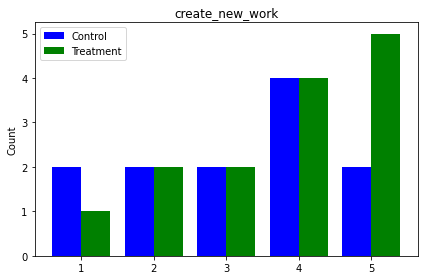

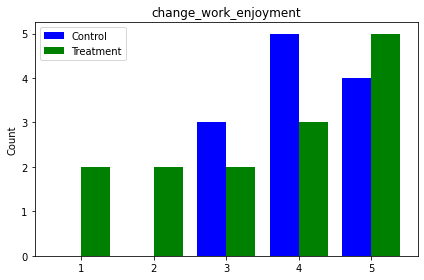

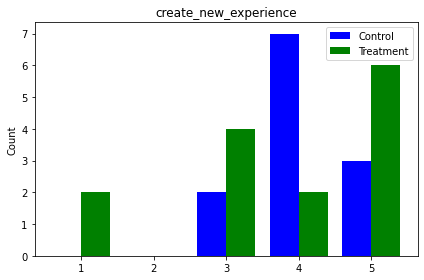

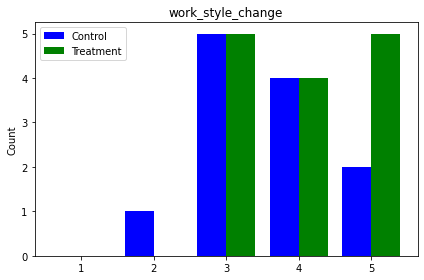

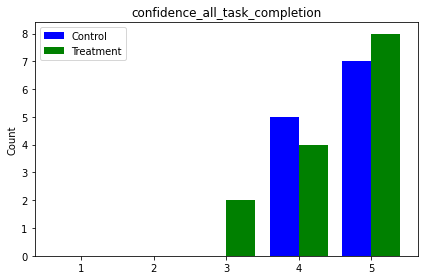

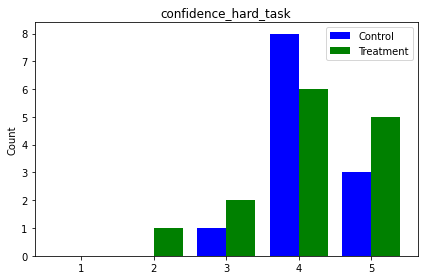

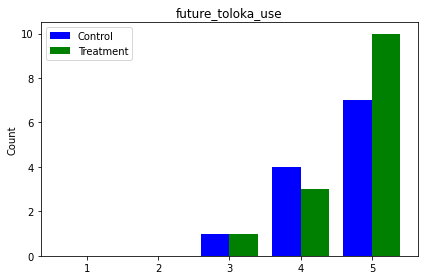

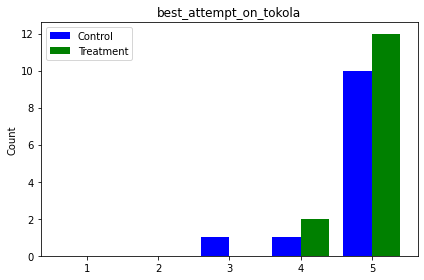

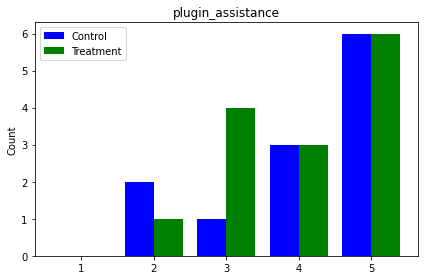

In [44]:
plothist('create_new_work')
plothist('change_work_enjoyment')
plothist('create_new_experience')
plothist('work_style_change')
plothist('confidence_all_task_completion')
plothist('confidence_hard_task')
plothist('future_toloka_use')
plothist('best_attempt_on_tokola')
plothist('plugin_assistance')

In [45]:
# for compare between GN/GS, Mono and Poly within the control or treatment group for the post-survey data

def plot_compare(group, category, measure):
    if group == "control":
        data = postsurvey_control
    else:
        data = postsurvey_treatment
        
    if measure == "region":
        label1 = "global_north"
        label2 = "global_south"
    else:
        label1 = "Monochronic"
        label2 = "Polychronic"
    
    countsMeasure1 = [(data[data[measure] == label1][category]==j).sum() for j in range(1,6)]
    countsMeasure2 = [(data[data[measure] == label2][category]==j).sum() for j in range(1,6)]
    
    labels = [1,2,3,4,5]
    x = np.arange(len(labels))+1  # the label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x-0.2, countsMeasure1, width, label=label1, color = 'blue')
    ax.bar(x+0.2, countsMeasure2, width, label=label2, color = 'red')

    ax.set_ylabel('Count')
    ax.set_title(category + "_" + group)
    ax.legend()
    
    fig.tight_layout()

    return plt.show()

In [46]:
[(postsurvey_control[postsurvey_control["chronicity"] == "Monochronic"]["create_new_work"]==j).sum() for j in range(1,6)]

[0, 1, 2, 2, 1]

In [47]:
[(postsurvey_control[postsurvey_control["region"] == "global_north"]["create_new_work"]==j).sum() for j in range(1,6)]

[0, 1, 2, 2, 1]

In [48]:
# the counts are the same since chronicity is based on the region?

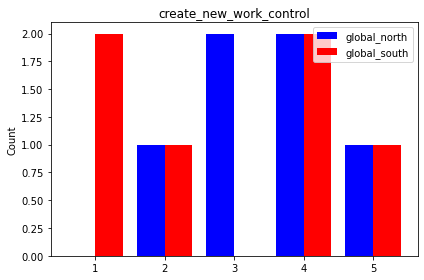

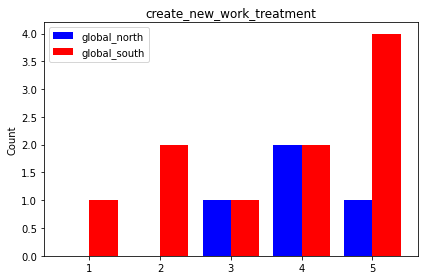

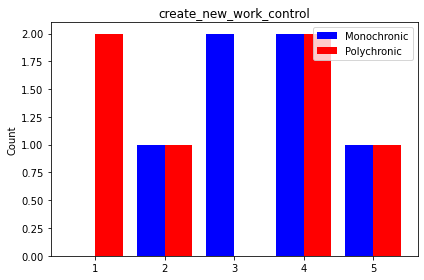

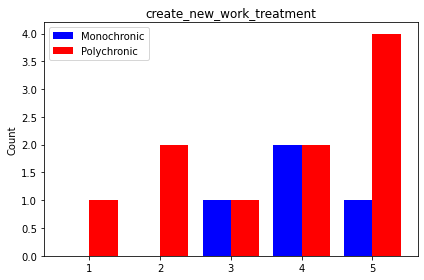

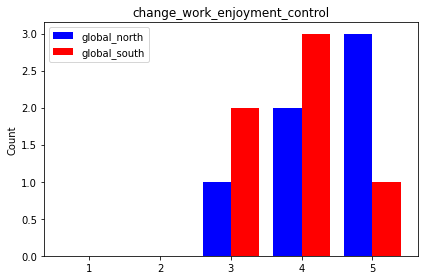

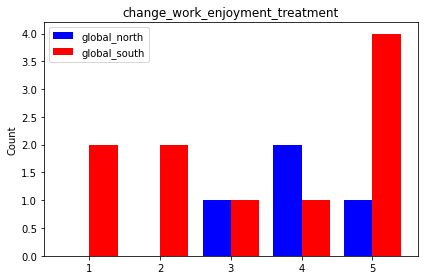

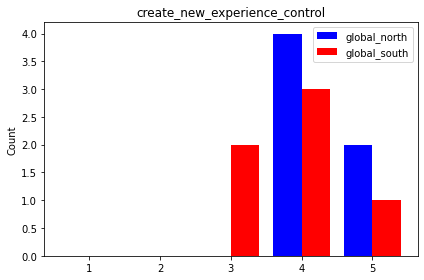

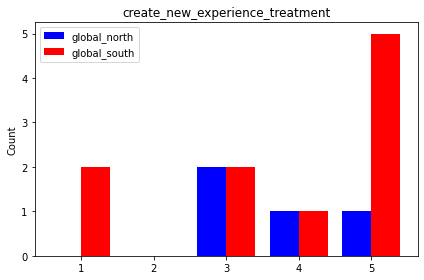

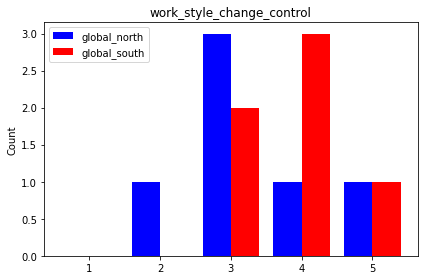

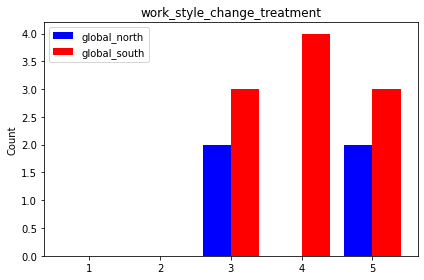

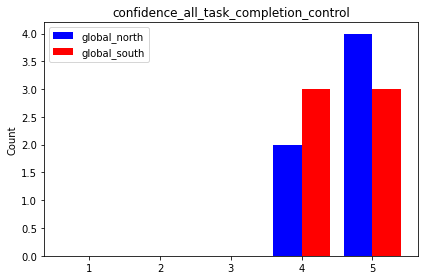

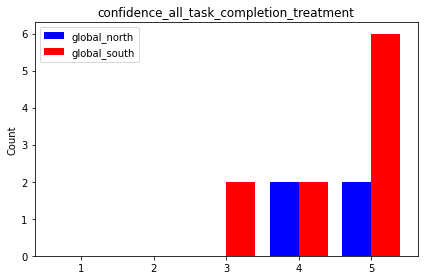

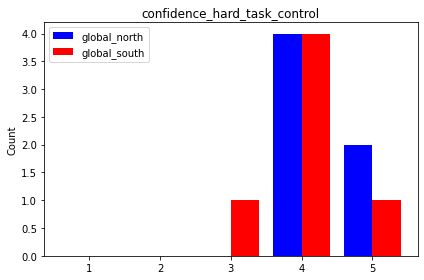

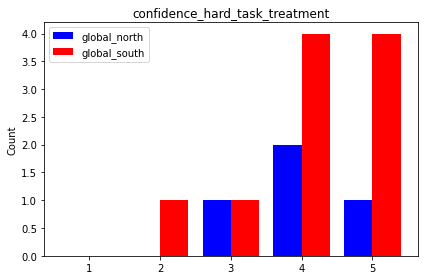

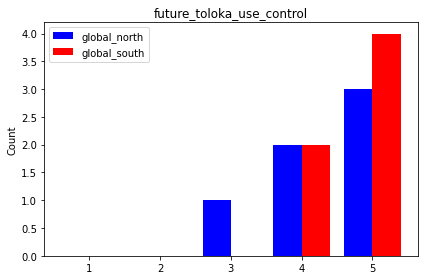

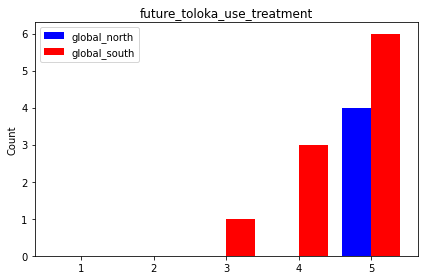

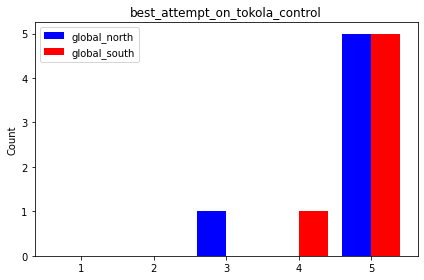

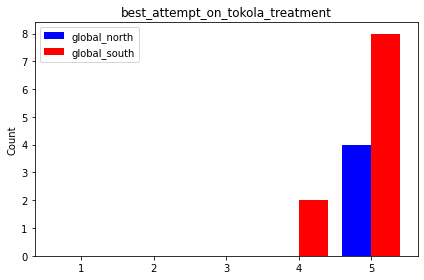

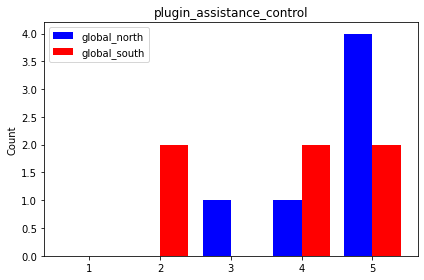

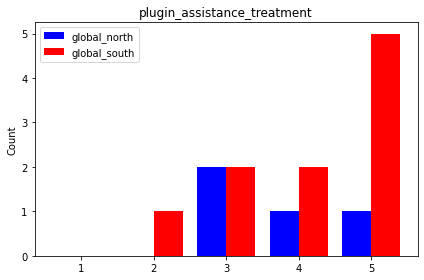

In [49]:
# use the below commands to create plots for other likert questions
plot_compare("control", "create_new_work", "region")
plot_compare("treatment", "create_new_work", "region")

plot_compare("control", "create_new_work", "chronicity") # this plot may not be necessary since chronicity is based on region
plot_compare("treatment", "create_new_work", "chronicity")

plot_compare("control", "change_work_enjoyment", "region")
plot_compare("treatment", "change_work_enjoyment", "region")

plot_compare("control", "create_new_experience", "region")
plot_compare("treatment", "create_new_experience", "region")

plot_compare("control", "work_style_change", "region")
plot_compare("treatment", "work_style_change", "region")

plot_compare("control", "confidence_all_task_completion", "region")
plot_compare("treatment", "confidence_all_task_completion", "region")

plot_compare("control", "confidence_hard_task", "region")
plot_compare("treatment", "confidence_hard_task", "region")

plot_compare("control", "future_toloka_use", "region")
plot_compare("treatment", "future_toloka_use", "region")

plot_compare("control", "best_attempt_on_tokola", "region")
plot_compare("treatment", "best_attempt_on_tokola", "region")

plot_compare("control", "plugin_assistance", "region")
plot_compare("treatment", "plugin_assistance", "region")

## Week 3 & 4 Summaries

We currently have 6 Monochronic and 6 Polychronic individuals in the control group who have completed the post-survey survey. Of these 12, 6 were identified as being in the global north, and 6 were identified as being in the global south. We also currently have 4 Monochronic and 10 Polychronic individuals in the treatment group who completed the post-survey. Of these 14, 4 were identified as being in the global north, and 10 were identified as being in the global south.

Overall, those in the treatment group indicated stronger opinions (4s and 5s) when answering the post-survey questions, which suggests that the plugin tended to make participants’ user experience better when using Toloka. These early results also suggest that, in terms of the plugins level of success between Polychronic and Monochronic individuals, Polychronic individuals in the treatment group:
* Appear to have had a stronger opinion (5s) on the plugin's ability to create new work schedules, 
* Appear to have a bigger change in enjoyment when using the platform. 
* Indicated that the plugin created new experience 
* Indicated that the plugin changed their work style on Toloka. 
* Indicated higher confidence when completing all tasks as well as hard tasks when using the plugin
* Indicated that the plugin better helped them rise to their potential and use their strengths.
* When compared to Monochronic individuals in the treatment group.

Keep in mind that the number of post-survey participants is still very low and that more responses should be coming in soon so these initial findings should not be taken as a fact yet.


## Week 5 Task 3

In [50]:
combined = pd.read_pickle('./data/combined.pkl')
with open('./data/combined_alias.pkl', 'rb') as handle:
    combined_alias = pickle.load(handle)
with open('./data/combined_scale_alias.pkl', 'rb') as handle:
    combined_scale_alias = pickle.load(handle)

In [51]:
# computing medians for Control Mono

mono_control = combined[(combined["group"] == "control") & (combined["chronicity"] == "Monochronic")]
mono_control_medians = mono_control.median()
mono_control_medians

freq_browser                          4.0
freq_phone                            4.0
length_use                            3.0
freq_use                              4.0
ability_find_tasks                    4.0
promptly_find_tasks                   4.0
text_search_preference                4.0
notification_preference               5.0
message_preference                    4.0
other_markets_length_use              4.0
authority_comfort                     4.0
collective_individual_scale           3.0
planning_scale                        3.0
timeliness_scale                      3.0
emotion_scale                         4.0
success_rating                        4.0
leadership_rating                     4.0
leadership_preference                 3.0
gender_preference                     3.0
multitasking                          3.0
short_term_plans                      3.0
linear_work_style                     4.0
plan_change_aversion                  4.0
plan_change_adaptable             

In [52]:
# computing medians for Control Poly

poly_control = combined[(combined["group"] == "control") & (combined["chronicity"] == "Polychronic")]
poly_control_medians = poly_control.median()
poly_control_medians

freq_browser                          5.0
freq_phone                            4.0
length_use                            3.0
freq_use                              5.0
ability_find_tasks                    4.0
promptly_find_tasks                   4.0
text_search_preference                4.0
notification_preference               5.0
message_preference                    5.0
other_markets_length_use              3.0
authority_comfort                     4.5
collective_individual_scale           3.0
planning_scale                        4.0
timeliness_scale                      4.0
emotion_scale                         4.0
success_rating                        4.0
leadership_rating                     4.0
leadership_preference                 3.0
gender_preference                     3.0
multitasking                          2.5
short_term_plans                      3.0
linear_work_style                     4.0
plan_change_aversion                  5.0
plan_change_adaptable             

In [53]:
# computing medians for Treatment Mono

mono_treatment = combined[(combined["group"] == "treatment") & (combined["chronicity"] == "Monochronic")]
mono_treatment_medians = mono_treatment.median()
mono_treatment_medians

freq_browser                          5.0
freq_phone                            5.0
length_use                            4.0
freq_use                              4.5
ability_find_tasks                    4.0
promptly_find_tasks                   5.0
text_search_preference                5.0
notification_preference               5.0
message_preference                    5.0
other_markets_length_use              4.0
authority_comfort                     4.0
collective_individual_scale           4.0
planning_scale                        4.0
timeliness_scale                      4.0
emotion_scale                         4.0
success_rating                        5.0
leadership_rating                     4.0
leadership_preference                 4.0
gender_preference                     3.0
multitasking                          3.0
short_term_plans                      4.0
linear_work_style                     4.0
plan_change_aversion                  5.0
plan_change_adaptable             

In [54]:
# computing medians for Treatment Poly

poly_treatment = combined[(combined["group"] == "treatment") & (combined["chronicity"] == "Polychronic")]
poly_treatment_medians = poly_treatment.median()
poly_treatment_medians

freq_browser                          5.0
freq_phone                            4.5
length_use                            4.0
freq_use                              5.0
ability_find_tasks                    5.0
promptly_find_tasks                   4.0
text_search_preference                4.0
notification_preference               5.0
message_preference                    5.0
other_markets_length_use              2.0
authority_comfort                     4.0
collective_individual_scale           3.0
planning_scale                        4.0
timeliness_scale                      5.0
emotion_scale                         4.0
success_rating                        4.0
leadership_rating                     4.0
leadership_preference                 3.0
gender_preference                     3.0
multitasking                          3.0
short_term_plans                      3.0
linear_work_style                     5.0
plan_change_aversion                  4.0
plan_change_adaptable             

## Week 5 Task 4

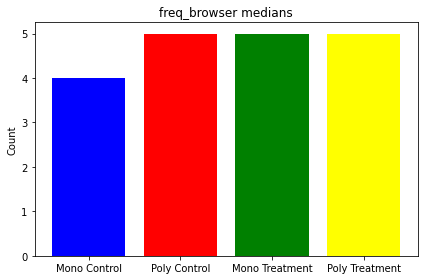

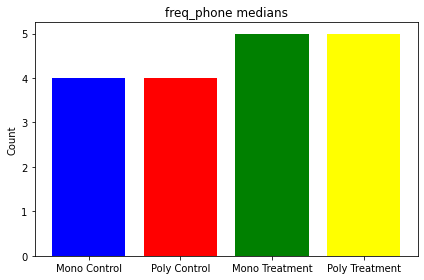

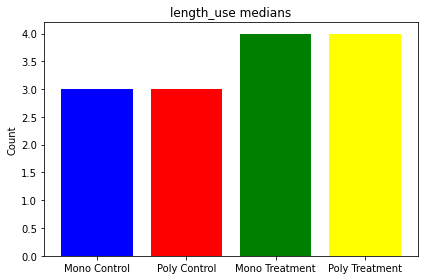

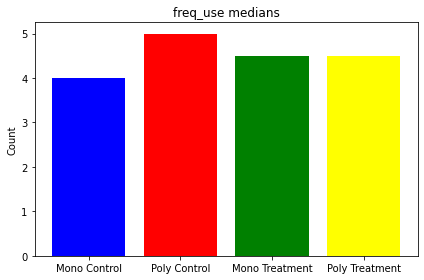

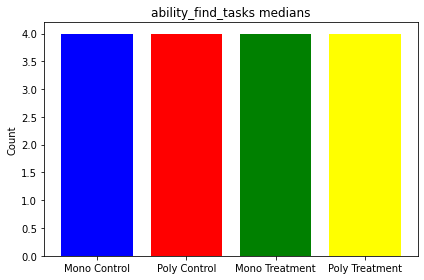

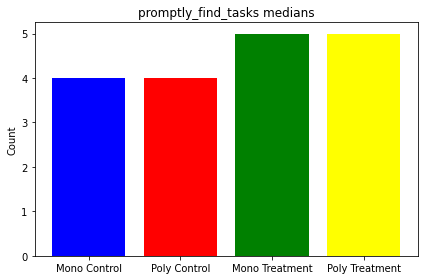

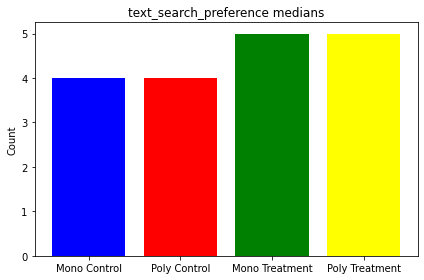

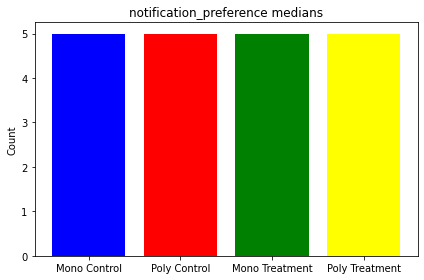

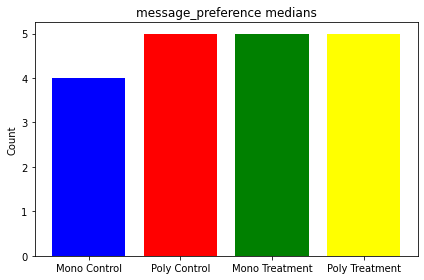

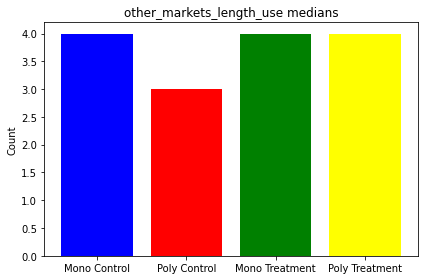

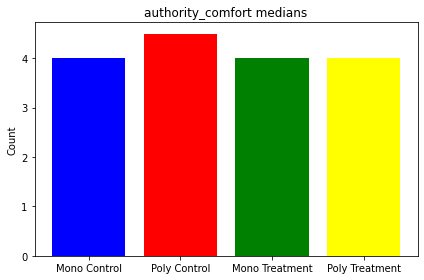

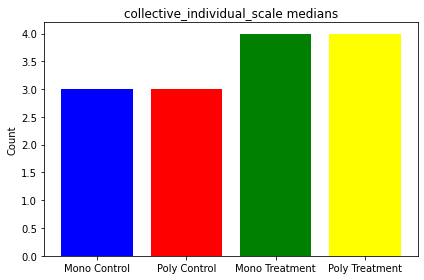

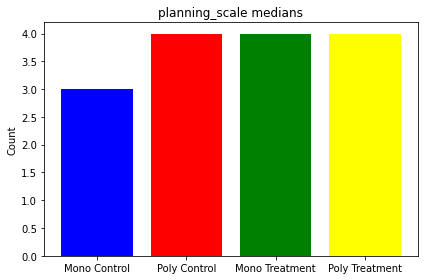

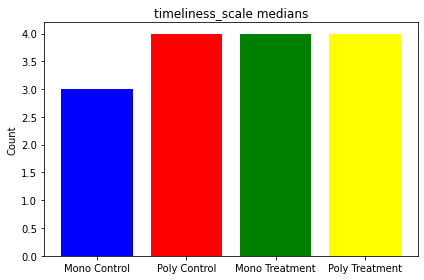

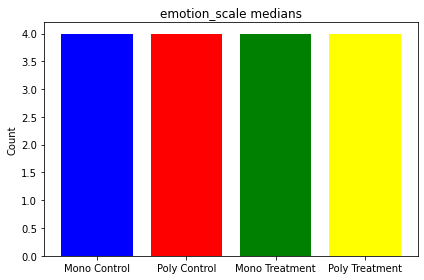

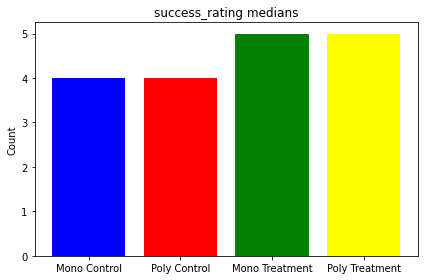

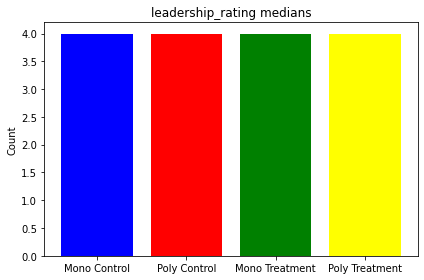

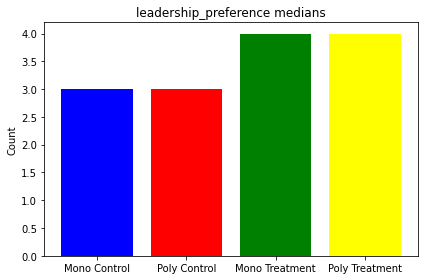

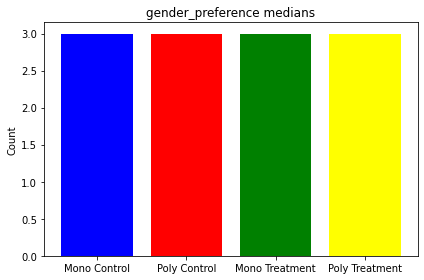

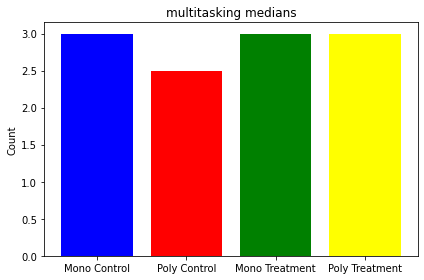

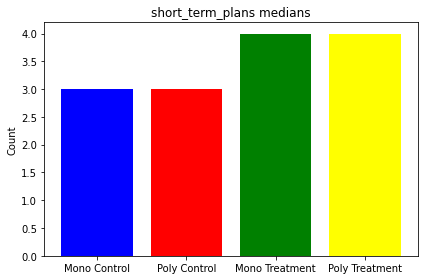

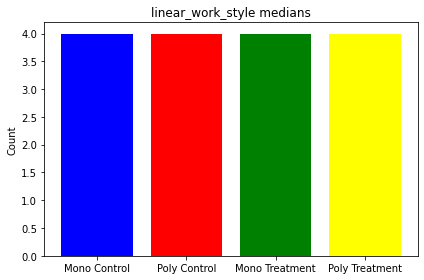

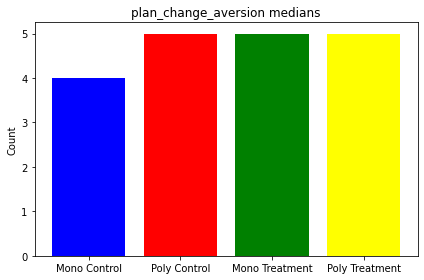

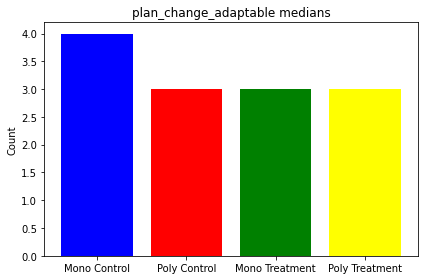

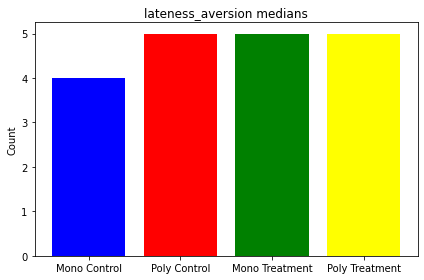

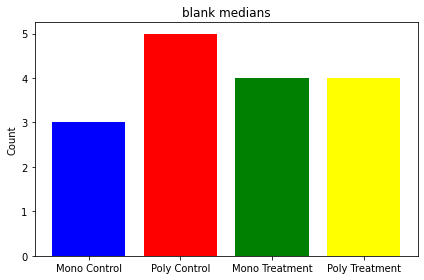

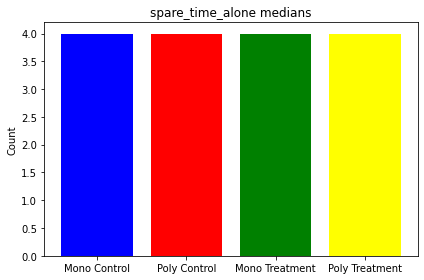

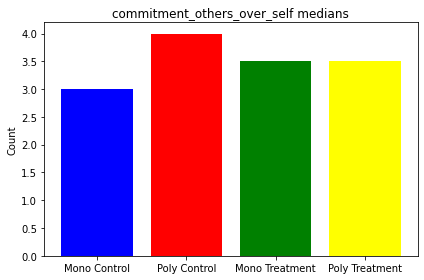

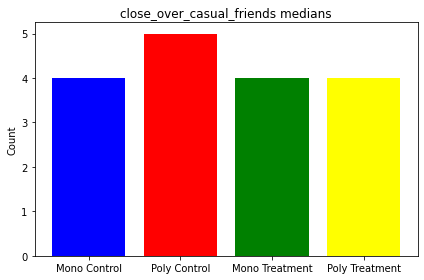

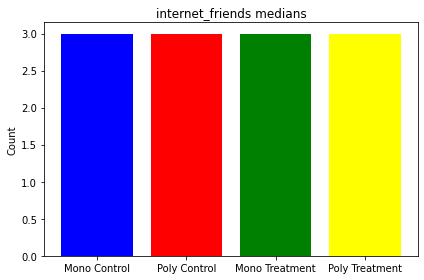

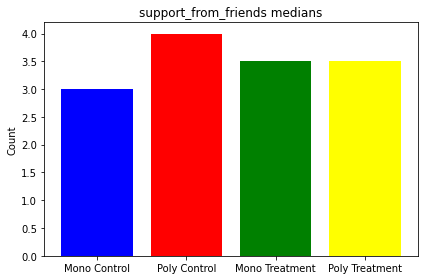

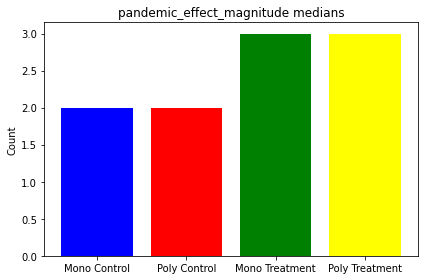

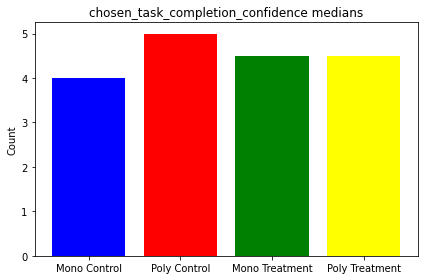

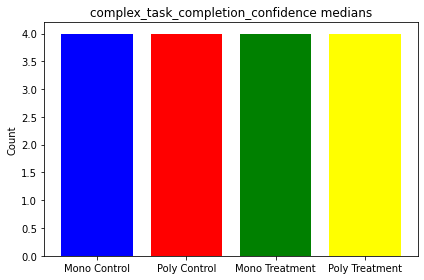

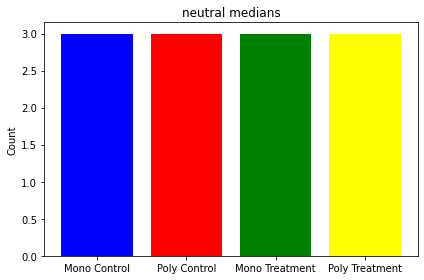

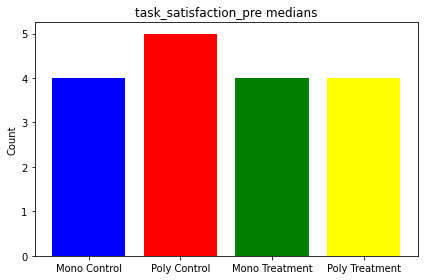

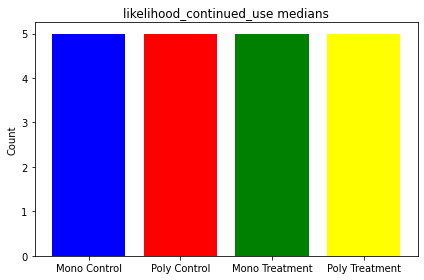

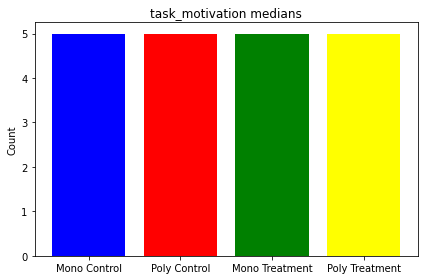

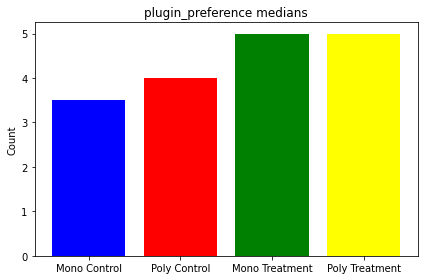

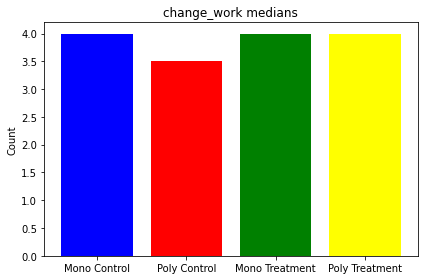

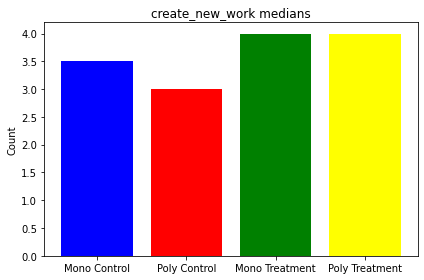

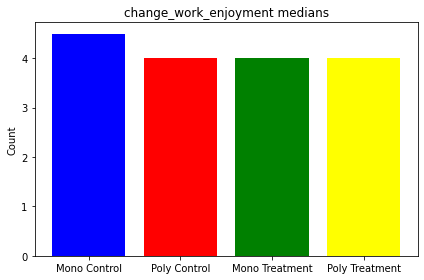

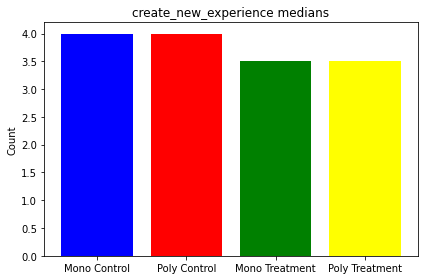

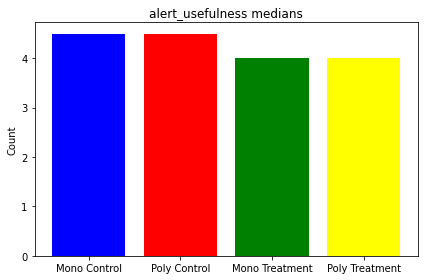

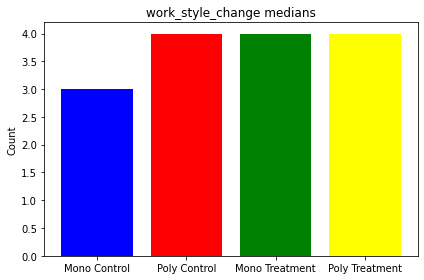

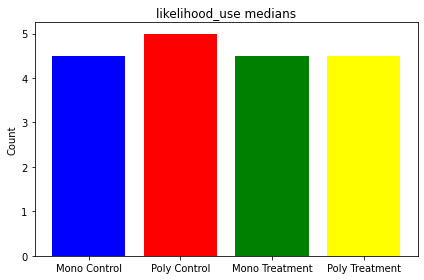

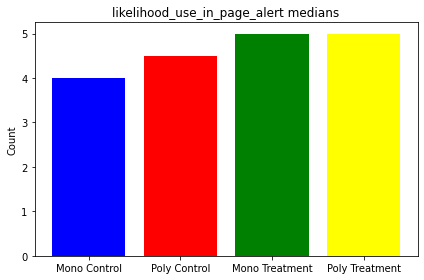

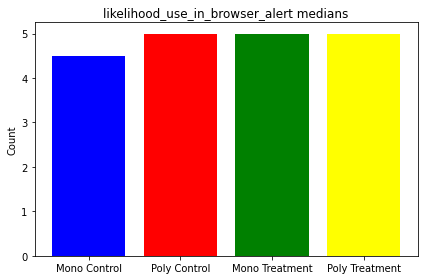

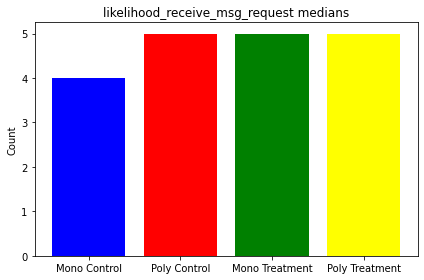

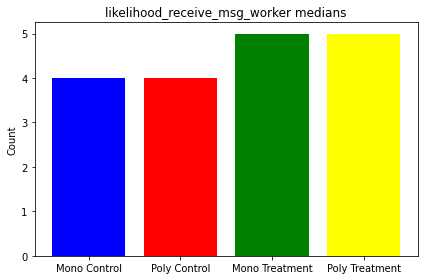

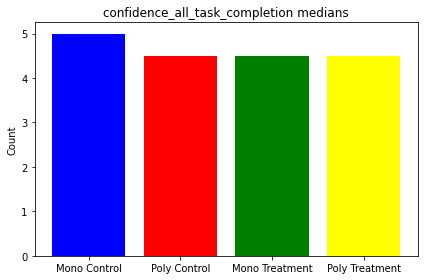

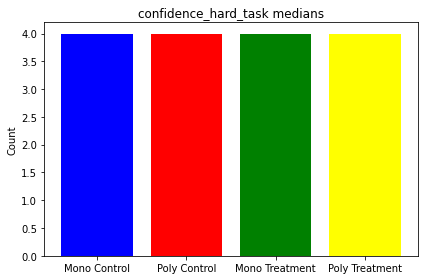

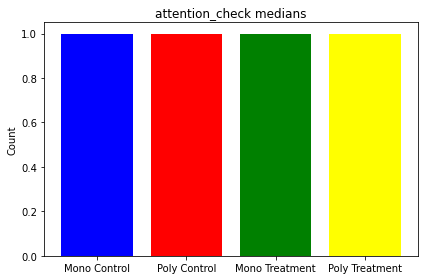

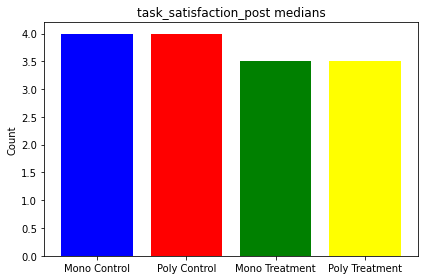

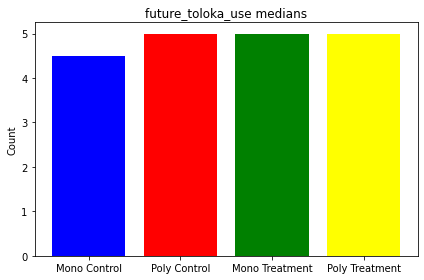

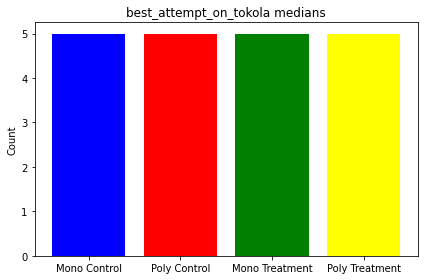

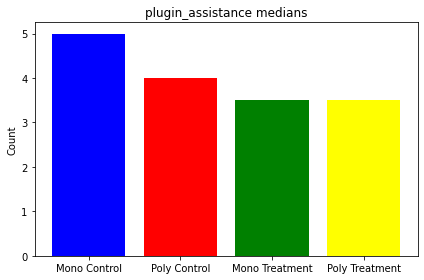

In [55]:
labels = mono_control_medians.index
mono_control_values = mono_control_medians.array
poly_control_values = poly_control_medians.array
mono_treatment_values = mono_treatment_medians.array
mono_treatment_values = mono_treatment_medians.array

for i in range(len(labels)):
    groups = ["Mono Control", "Poly Control", "Mono Treatment", "Poly Treatment"]
    medians = [mono_control_values[i], poly_control_values[i], mono_treatment_values[i], mono_treatment_values[i]]
    
    fig, ax = plt.subplots()
    ax.bar(groups, medians, color = ["blue", "red", "green", "yellow"])
    ax.set_ylabel('Count')
    ax.set_title(labels[i] + " medians")
    
    fig.tight_layout()
    plt.show()


We computed the medians for our four groups Monochronic Control, Polychronic Control, Monochronic Treatment, and Polychronic Treatment. There were many cases in which the medians where the categories are the same including but not limited to ability_find_task, notification_preference, emption_scale, leadership_rating, gender_prefence, linear_work_style, spend_time_alone, internet_friends, complex_task_completion_confidence, neutral, liklihood continued_use, task_motivation, condidence_hard_task, and attention_check. This similarity could be due to the nature of each of those questions and either the ability of the user or their preferences being similar to the other testers.

In quite a few cases the Monochronic Control group is slightly different than the others. This is present in freq_browser medians (MC 4 VS 5 for others), message_preference (MC 4 VS 5 for others), planning_scale (MC 3 vs 4 for others), timeliness_scale (MC 3 vs 4 for others), plan_change_aversion (MC 4 VS 5 for others), plan_change_adaptable (MC 4 VS 3 for others), lateness_aversion (MC 4 VS 5 for others), change_work_enhoyment (MC >4 VS <4 for others), likelihood_use_in_browser_alert (MC <5 VS 5 for others), likelihood_recieve_msg_request (MC 4 VS 5 for others), confidence_all_task_completion (MC 5 VS 4.5 for others), future_toloka_use (MC 4.5 VS 5 for others). This could be due to how the Monochronic Control group interpreted the task given given their chronicity and specific task they were given. There were many cases where the Monochronic control group stood out and was unique from all the other 3 groups in the study. There were no instances where one of the groups was more than 2 points below the highest median

Looking at the data, it appears that in a lot of cases where there are differences, the two control groups tend to have close medians and the treatment groups tend to be most similar to each other. The similarties are based on control vs treatment group and not monochronic vs polychronic groups. This can be seen in freq_phone, length_use, proptly_find_tasks, text_search_preferences, collective_individual_scale, sucess_rating, leadership_prefence, short_term_plans, pandemic_effect_magnitude, plugin_preference, create_new_experience, alert_usefulness, liklihood_recieve_msg_worker, task_satisfaction_post. In all these examples, the treatment groups medians are similar and the control groups values are similar. There are not many examples where the similarities are based on chronicity. It would be interesting to investigate if the chronicities have an affect on the user experience or if it is truely just the control group's experience is different than the treatment and that is causing the change.

## Week 6

### Task 1
data loading

In [56]:
# load the downloded datasets

computed_joint_data = pd.read_csv("./data/computed_joint_data.csv")
computed_joint_data = computed_joint_data.drop(['Unnamed: 0'], axis=1)
computed_joint_data

,id,mode,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,...,MESSAGES_READ,TASK_INFO,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION
0,6f1753e09611df5751d6abe4b1ca2724,ACTIVE,9.000000,49.000000,31.0,0,32.000000,0.000000,0.000000,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6f1753e09611df5751d6abe4b1ca2724,PASSIVE,7.000000,18.666667,15.0,0,0.666667,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,27fab4b7ccdc585dc35897de76e44a8c,ACTIVE,1.000000,9.000000,1.0,0,12.000000,10.000000,0.000000,30.0,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,27fab4b7ccdc585dc35897de76e44a8c,PASSIVE,1.500000,7.000000,1.0,0,3.500000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,356cd2c5f07830925f6a46ee42e9c748,ACTIVE,47.333333,30.000000,81.0,0,5.333333,0.666667,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,684e25e7922cebd2b298db387aa86b,PASSIVE,84.000000,63.000000,213.5,0,10.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
84,732db8b6b7c6daeb4e36ab82758b9e42,ACTIVE,146.000000,115.000000,236.0,0,17.000000,2.000000,1.000000,6621.0,...,1.0,2.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0
85,732db8b6b7c6daeb4e36ab82758b9e42,PASSIVE,39.000000,20.000000,38.0,0,3.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
86,559cbf8dad41224391887f67b67777f6,ACTIVE,146.000000,92.000000,465.0,0,30.000000,0.000000,0.000000,0.0,...,6.0,0.5,4.0,68.5,0.0,9.0,0.0,0.0,1.0,0


### Task 2

Per each worker we have the activity during the week the plugin was disabled (mode=PASSIVE) and the activities during the week when the plugin was enabled (mode=ACTIVE). Group the values by conditions (control-mono, control-poly, treatment-mono, treatment-poly)

In [57]:
# upon inspection we see that each user has a passive entry and a active entry

len(list(computed_joint_data['id'].unique())) # yields 44
computed_joint_data[computed_joint_data['id'] == '559cbf8dad41224391887f67b67777f6']

,id,mode,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,...,MESSAGES_READ,TASK_INFO,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION
86,559cbf8dad41224391887f67b67777f6,ACTIVE,146.0,92.0,465.0,0,30.0,0.0,0.0,0.0,...,6.0,0.5,4.0,68.5,0.0,9.0,0.0,0.0,1.0,0
87,559cbf8dad41224391887f67b67777f6,PASSIVE,48.0,94.0,79.0,0,19.0,0.0,0.0,0.0,...,4.5,0.0,12.5,5.5,0.0,0.0,0.0,0.0,0.0,0


In [58]:
# add the group, and the chronicity to the new data
with_added = pd.merge(computed_joint_data, combined[['id', 'group', 'chronicity']], on=["id"])
with_added   

,id,mode,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,...,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION,group,chronicity
0,6f1753e09611df5751d6abe4b1ca2724,ACTIVE,9.000000,49.000000,31.0,0,32.000000,0.000000,0.000000,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
1,6f1753e09611df5751d6abe4b1ca2724,PASSIVE,7.000000,18.666667,15.0,0,0.666667,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
2,27fab4b7ccdc585dc35897de76e44a8c,ACTIVE,1.000000,9.000000,1.0,0,12.000000,10.000000,0.000000,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Polychronic
3,27fab4b7ccdc585dc35897de76e44a8c,PASSIVE,1.500000,7.000000,1.0,0,3.500000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Polychronic
4,356cd2c5f07830925f6a46ee42e9c748,ACTIVE,47.333333,30.000000,81.0,0,5.333333,0.666667,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Polychronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,684e25e7922cebd2b298db387aa86b,PASSIVE,84.000000,63.000000,213.5,0,10.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
84,732db8b6b7c6daeb4e36ab82758b9e42,ACTIVE,146.000000,115.000000,236.0,0,17.000000,2.000000,1.000000,6621.0,...,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
85,732db8b6b7c6daeb4e36ab82758b9e42,PASSIVE,39.000000,20.000000,38.0,0,3.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
86,559cbf8dad41224391887f67b67777f6,ACTIVE,146.000000,92.000000,465.0,0,30.000000,0.000000,0.000000,0.0,...,4.0,68.5,0.0,9.0,0.0,0.0,1.0,0,control,Polychronic


In [59]:
# for the control group
control_mono = with_added[(with_added["group"] == "control") & (with_added["chronicity"] == "Monochronic")].reset_index(drop=True)
# 32 entries

control_poly = with_added[(with_added["group"] == "control") & (with_added["chronicity"] == "Polychronic")].reset_index(drop=True)
# 28 entries

In [60]:
# for the treatment group
treatment_mono = with_added[(with_added["group"] == "treatment") & (with_added["chronicity"] == "Monochronic")].reset_index(drop=True)
# 8 entries

treatment_poly = with_added[(with_added["group"] == "treatment") & (with_added["chronicity"] == "Polychronic")].reset_index(drop=True)
# 20 entries

### Task 3
Compare the increment or decrement on activity of each field (from PASSIVE to ACTIVE) per each condition

In [61]:
fields = ['TASK_STARTED_LOAD',
 'TASKS_LIST_LOAD',
 'TASK_SUBMITED_LOAD',
 'FINISHED_TASK_LOAD',
 'BELL_CLICK',
 'SETT_CLICK',
 'SETT_SAVE',
 'MSG_RCV_WORKER', 
 'MSG_CLICK_WORKER',
 'MSG_RCV_REQUESTER',
 'MSG_CLICK_REQUESTER',
 'LIST_NEW',
 'LIST_RECOM',
 'LIST_PAY',
 'TASK_HIDE_ON',
 'TASK_HIDE_OFF',
 'tasks_count',
 'wage_sum',
 'wage_max',
 'Unnamed: 0_x',
 'all_tasks_count',
 'all_rewards',
 'TASKS_LIST',
 'MESSAGES_READ',
 'TASK_INFO',
 'TASK_TIMEOUT',
 'TASK_SUBMITED',
 'WORKER_EARNINGS',
 'WORKER_EARNINGS_DETAILS',
 'WORKER_DASHBOARD',
 'WORKER_QUALIFICATIONS',
 'TASK_QUEUE',
 'MESSAGES_NOTIFICATION']

In [62]:
# calculate the difference from passive to active for each participant 
def calculate_diff(group):
    df = group[fields].diff(periods = 1) # calculate the difference between every two rows
    inx = [i for i in range (len(df)) if i % 2 == 0] # filtered out the rows that we don't need 
                                                     #(e.g. diff between 2nd and 3rd row, because we want 3rd and 4th row)
    df = df.drop(df.index[[inx]]).reset_index(drop=True) # reset the index
    df.insert(0, 'id', list(group['id'].unique())) # add the IDs back to the calculated values
    return df

In [63]:
treatment_mono

,id,mode,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,...,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION,group,chronicity
0,6f1753e09611df5751d6abe4b1ca2724,ACTIVE,9.000000,49.000000,31.0,0,32.000000,0.0,0.0,26.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
1,6f1753e09611df5751d6abe4b1ca2724,PASSIVE,7.000000,18.666667,15.0,0,0.666667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
2,6b4cd1c49a60f0cd87c83910d58249,ACTIVE,2.333333,8.666667,4.0,0,10.666667,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
3,6b4cd1c49a60f0cd87c83910d58249,PASSIVE,3.000000,4.000000,3.0,0,4.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
4,6ecf5c6464172449bad6820af297e50,ACTIVE,143.000000,118.000000,274.0,0,57.000000,0.0,0.0,115.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
5,6ecf5c6464172449bad6820af297e50,PASSIVE,78.500000,297.500000,103.5,0,3.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
6,12a018d67276e148c066f78ec99232ac,ACTIVE,15.000000,14.000000,39.0,0,14.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic
7,12a018d67276e148c066f78ec99232ac,PASSIVE,0.000000,3.000000,0.0,0,5.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,treatment,Monochronic


In [64]:
calculate_diff(treatment_mono)

# call the method on dfs for other groups

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,id,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,MSG_CLICK_WORKER,...,MESSAGES_READ,TASK_INFO,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION
0,6f1753e09611df5751d6abe4b1ca2724,-2.000000,-30.333333,-16.0,0.0,-31.333333,0.0,0.0,-26.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6b4cd1c49a60f0cd87c83910d58249,0.666667,-4.666667,-1.0,0.0,-6.666667,0.0,0.0,-0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6ecf5c6464172449bad6820af297e50,-64.500000,179.500000,-170.5,0.0,-54.000000,0.0,0.0,-115.000000,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12a018d67276e148c066f78ec99232ac,-15.000000,-11.000000,-39.0,0.0,-9.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
calculate_diff(treatment_mono).mean()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


TASK_STARTED_LOAD         -20.208333
TASKS_LIST_LOAD            33.375000
TASK_SUBMITED_LOAD        -56.625000
FINISHED_TASK_LOAD          0.000000
BELL_CLICK                -25.250000
SETT_CLICK                  0.000000
SETT_SAVE                   0.000000
MSG_RCV_WORKER            -35.333333
MSG_CLICK_WORKER           -1.750000
MSG_RCV_REQUESTER         -12.500000
MSG_CLICK_REQUESTER        -0.250000
LIST_NEW                   -1.250000
LIST_RECOM                 -2.750000
LIST_PAY                   -1.250000
TASK_HIDE_ON                0.000000
TASK_HIDE_OFF              -2.750000
tasks_count               -51.083333
wage_sum                    0.000000
wage_max                    0.000000
Unnamed: 0_x                1.000000
all_tasks_count            17.791667
all_rewards                 0.664167
TASKS_LIST                  0.000000
MESSAGES_READ               0.000000
TASK_INFO                   0.000000
TASK_TIMEOUT                0.000000
TASK_SUBMITED               0.000000
W

In [77]:
calculate_diff(treatment_mono).sum()

id                         6f1753e09611df5751d6abe4b1ca27246b4cd1c49a60f0...
TASK_STARTED_LOAD                                                   -80.8333
TASKS_LIST_LOAD                                                        133.5
TASK_SUBMITED_LOAD                                                    -226.5
FINISHED_TASK_LOAD                                                         0
BELL_CLICK                                                              -101
SETT_CLICK                                                                 0
SETT_SAVE                                                                  0
MSG_RCV_WORKER                                                      -141.333
MSG_CLICK_WORKER                                                          -7
MSG_RCV_REQUESTER                                                        -50
MSG_CLICK_REQUESTER                                                       -1
LIST_NEW                                                                  -5

In [70]:
calculate_diff(treatment_poly)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,id,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,MSG_CLICK_WORKER,...,MESSAGES_READ,TASK_INFO,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION
0,27fab4b7ccdc585dc35897de76e44a8c,0.500000,-2.0,0.0,0.0,-8.500000,-10.000000,0.000000,-30.000000,0.0,...,-3.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,356cd2c5f07830925f6a46ee42e9c748,-47.333333,-27.5,-81.0,0.0,-3.833333,-0.666667,-0.333333,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,25daec93559c8d639738bb2c2d8f3194,55.000000,37.0,69.5,0.0,-16.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,ae18ab1aea6162de2276501ad651b6,-10.500000,-195.0,-61.0,0.0,-58.000000,-4.000000,0.000000,-334.000000,0.0,...,-2.000000,-2.000000,0.000000,-4.500000,0.0,0.0,0.0,0.0,0.000000,0.0
4,f3cc482e6ec9e826e94d25d3aaa4bd9,33.500000,44.0,223.0,0.0,-25.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5,889a287c6220a3d0698868dc7ac7243f,-9.666667,-2.5,-6.0,0.0,-2.500000,-0.666667,0.000000,-93.666667,-3.0,...,-0.333333,-0.333333,-0.333333,-0.666667,0.0,0.0,0.0,0.0,-0.333333,0.0
6,3741da8e9dd5e15f64a570dbb218a7,-34.500000,-19.0,-28.0,0.0,-6.500000,0.000000,0.000000,-79.000000,0.0,...,-5.000000,0.000000,-0.500000,-7.000000,-1.0,0.0,0.0,0.0,0.000000,-1.0
7,fbd2ee5b8dcfa3d939cb5df1a92552,4.500000,-18.0,22.5,0.0,-22.000000,0.000000,0.000000,-597.000000,0.0,...,-2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
8,d3b3aaccd59dbdb3385a06dba56113,-48.000000,-30.0,-96.0,0.0,-23.000000,0.000000,0.000000,-15.000000,0.0,...,-1.500000,0.000000,0.000000,0.000000,-1.0,0.0,0.0,0.0,0.000000,0.0
9,71ba89843f2946e88698e3b5467d9,40.000000,-17.0,22.0,0.0,-102.500000,-1.000000,0.000000,-2314.000000,0.0,...,0.000000,0.500000,0.000000,-12.000000,0.0,0.0,0.0,0.0,-1.000000,0.0


In [72]:
calculate_diff(treatment_poly).mean()


TASK_STARTED_LOAD           -1.650000
TASKS_LIST_LOAD            -23.000000
TASK_SUBMITED_LOAD           6.500000
FINISHED_TASK_LOAD           0.000000
BELL_CLICK                 -26.783333
SETT_CLICK                  -1.633333
SETT_SAVE                   -0.033333
MSG_RCV_WORKER            -346.266667
MSG_CLICK_WORKER            -0.300000
MSG_RCV_REQUESTER          -12.800000
MSG_CLICK_REQUESTER         -0.100000
LIST_NEW                    -1.533333
LIST_RECOM                  -0.733333
LIST_PAY                    -0.866667
TASK_HIDE_ON                 0.000000
TASK_HIDE_OFF               -0.033333
tasks_count               -128.716667
wage_sum                     0.018667
wage_max                     0.018667
Unnamed: 0_x                 1.000000
all_tasks_count             16.833333
all_rewards                  0.557833
TASKS_LIST                 -10.666667
MESSAGES_READ               -1.383333
TASK_INFO                   -0.183333
TASK_TIMEOUT                -0.083333
TASK_SUBMITE

In [76]:
calculate_diff(treatment_poly).sum()


id                         27fab4b7ccdc585dc35897de76e44a8c356cd2c5f07830...
TASK_STARTED_LOAD                                                      -16.5
TASKS_LIST_LOAD                                                         -230
TASK_SUBMITED_LOAD                                                        65
FINISHED_TASK_LOAD                                                         0
BELL_CLICK                                                          -267.833
SETT_CLICK                                                          -16.3333
SETT_SAVE                                                          -0.333333
MSG_RCV_WORKER                                                      -3462.67
MSG_CLICK_WORKER                                                          -3
MSG_RCV_REQUESTER                                                       -128
MSG_CLICK_REQUESTER                                                       -1
LIST_NEW                                                            -15.3333

In [67]:
calculate_diff(control_mono)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,id,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,MSG_CLICK_WORKER,...,MESSAGES_READ,TASK_INFO,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION
0,95d3785df122a99679fdd8cb4d6e4a0,23.50,-11.00,15.5,0.0,-22.0,0.0,0.0,-56.0,0.0,...,-4.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,32ae306c14a39c07f685ea94adf6475,5.50,-22.50,8.5,0.0,-18.5,0.0,0.0,-328.0,0.0,...,-2.0,-0.5,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.0
2,69c0d3e67052b28759e150bca54f5f0,0.25,-6.25,0.0,0.0,-6.0,0.0,0.0,-105.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5fc991717e944f5142979e8878555271,-417.50,-81.50,-884.5,0.0,-213.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,86a36fbbe35a283dee16ff8280e5ed5,-49.00,-54.00,-108.0,0.0,-57.0,-13.0,0.0,0.0,0.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3e276dee7587aa0b0db8d1aca5998c5,-1359.75,-1602.50,-1509.5,0.0,-148.5,-2.0,0.0,-1596.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1d879cab6a4b14427458d7fa73a8e090,-41.00,-8.00,-67.0,0.0,-14.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,748688a097f2efa5eb772fead493e52,-16.50,-10.00,-19.0,0.0,-4.0,0.0,0.0,0.0,0.0,...,-2.0,0.0,0.0,-3.0,-1.0,0.0,-8.0,0.0,-2.0,0.0
8,e4991b4c586ddf9d8678278e5f348f,1.00,-11.00,-1.0,0.0,-7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.0,0.0,4.0,1.0,0.0,0.0,0.0
9,9b9ba913655727a73581c5131ef440,-11.00,60.00,-29.5,0.0,-14.5,-3.0,-1.0,0.0,0.0,...,-24.0,-3.5,-12.0,-31.0,-1.5,-2.0,-23.0,0.0,-4.0,0.0


In [73]:
calculate_diff(control_mono).mean()


TASK_STARTED_LOAD         -113.937500
TASKS_LIST_LOAD           -108.171875
TASK_SUBMITED_LOAD        -153.406250
FINISHED_TASK_LOAD           0.000000
BELL_CLICK                 -32.343750
SETT_CLICK                  -1.187500
SETT_SAVE                   -0.125000
MSG_RCV_WORKER            -130.375000
MSG_CLICK_WORKER             0.000000
MSG_RCV_REQUESTER         -164.375000
MSG_CLICK_REQUESTER         -0.750000
LIST_NEW                    -7.109375
LIST_RECOM                  -1.359375
LIST_PAY                    -1.718750
TASK_HIDE_ON                -0.078125
TASK_HIDE_OFF               -0.609375
tasks_count               -230.781250
wage_sum                    -0.051562
wage_max                    -0.054062
Unnamed: 0_x                 1.000000
all_tasks_count              2.453125
all_rewards                 -0.007812
TASKS_LIST                 -10.531250
MESSAGES_READ               -2.250000
TASK_INFO                   -0.593750
TASK_TIMEOUT                -0.781250
TASK_SUBMITE

In [75]:
calculate_diff(control_mono).sum()

id                         95d3785df122a99679fdd8cb4d6e4a032ae306c14a39c0...
TASK_STARTED_LOAD                                                      -1823
TASKS_LIST_LOAD                                                     -1730.75
TASK_SUBMITED_LOAD                                                   -2454.5
FINISHED_TASK_LOAD                                                         0
BELL_CLICK                                                            -517.5
SETT_CLICK                                                               -19
SETT_SAVE                                                                 -2
MSG_RCV_WORKER                                                         -2086
MSG_CLICK_WORKER                                                           0
MSG_RCV_REQUESTER                                                      -2630
MSG_CLICK_REQUESTER                                                      -12
LIST_NEW                                                             -113.75

In [78]:
control_poly

,id,mode,TASK_STARTED_LOAD,TASKS_LIST_LOAD,TASK_SUBMITED_LOAD,FINISHED_TASK_LOAD,BELL_CLICK,SETT_CLICK,SETT_SAVE,MSG_RCV_WORKER,...,TASK_TIMEOUT,TASK_SUBMITED,WORKER_EARNINGS,WORKER_EARNINGS_DETAILS,WORKER_DASHBOARD,WORKER_QUALIFICATIONS,TASK_QUEUE,MESSAGES_NOTIFICATION,group,chronicity
0,c8136de0d23979b64c985c7c1abb6c,ACTIVE,111.0,89.0,189.0,0,35.0,0.0,0.0,2415.0,...,2.0,22.0,0.0,48.0,2.0,0.0,0.0,0,control,Polychronic
1,c8136de0d23979b64c985c7c1abb6c,PASSIVE,71.0,53.5,156.5,0,14.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
2,414169349440a08f907a241578f76689,ACTIVE,20.0,17.0,36.0,0,18.0,0.0,0.0,33.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,control,Polychronic
3,414169349440a08f907a241578f76689,PASSIVE,39.5,12.0,33.5,0,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
4,4adad1b7b5717858cc36aed27ec3acf7,ACTIVE,4.0,44.0,2.0,0,30.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
5,4adad1b7b5717858cc36aed27ec3acf7,PASSIVE,9.5,21.5,20.0,0,13.5,0.0,0.0,0.0,...,0.0,1.5,0.5,1.5,0.0,0.0,0.0,0,control,Polychronic
6,7efc45e5132625d5314ddfc349384541,ACTIVE,1132.0,96.0,441.0,0,49.0,0.0,0.0,19.0,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
7,7efc45e5132625d5314ddfc349384541,PASSIVE,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
8,518cd56975ccc59032da3137d845c6b,ACTIVE,111.0,75.0,153.0,0,59.0,2.0,1.0,57.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic
9,518cd56975ccc59032da3137d845c6b,PASSIVE,22.0,14.0,21.0,0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,control,Polychronic


In [74]:
calculate_diff(control_poly).mean()


TASK_STARTED_LOAD          -88.642857
TASKS_LIST_LOAD            -24.071429
TASK_SUBMITED_LOAD         -56.821429
FINISHED_TASK_LOAD           0.000000
BELL_CLICK                 -24.107143
SETT_CLICK                  -1.285714
SETT_SAVE                   -0.285714
MSG_RCV_WORKER            -653.214286
MSG_CLICK_WORKER            -0.214286
MSG_RCV_REQUESTER           -4.642857
MSG_CLICK_REQUESTER          0.000000
LIST_NEW                    -0.392857
LIST_RECOM                  -1.250000
LIST_PAY                    -1.714286
TASK_HIDE_ON                -0.214286
TASK_HIDE_OFF               -0.250000
tasks_count               -237.678571
wage_sum                    -0.467143
wage_max                    -0.422143
Unnamed: 0_x                 1.000000
all_tasks_count              9.142857
all_rewards                  0.622143
TASKS_LIST                 -32.428571
MESSAGES_READ               -0.250000
TASK_INFO                   -0.285714
TASK_TIMEOUT                 0.285714
TASK_SUBMITE



This portion of the experiment involved test subjects doing various activities with plugins activated and disabled. We compared the increment or decrement of each activity when the plugin was activated and disabled by subtracting the passive and active fields per each item. This means that the absolute value of each number says the amount of difference for each field while the positive or negative indicates if activated or disabled is larger. We then averaged values for each column to see how each respective group did as a whole when comparing activated vs disabled plugins.

For the Monochronic treatment group, the most notable differences was task_submitted_load (-56.63), tasks count (-51.08), and msg_rcv_worker (-35.33). This means for all of those instances the active was greater than the passive . The only instances of passive being larger than active was during tasks_list_load (33.34) and all_tasks_count (17.79). This group is also notable as there are around 17 fields where the values for passive and active are currently 0.

Taking a deep dive into Polychronic treatment group, the differences appear to be a bit larger. Both msg_rcv_worker (-346.27) and tasks_count (-128.72) create quite a difference between passive and active measurements. The other tasks have an absolute difference of under 27, with most being less than +15 or -15. 

Investigating Monochronic control group, this appears to have the largest amount of differences below 100.  Task_started_load (-113.94), tasks_list_load (-108.17), task_submitted_load (-153.41), msg_rcv_worker (-130.38), msg_rcv_requester (-164.38), and tasks_count (-230.78) all have extremely low differences. This particular group is notable as there are the greatest amount of large differences and should be looked into closer. The other task differences are close to 0 with approximately 22 being between 5 or -5. 

The Polychronic control group has the most extreme range with the lowest value of -653.21 for msg_rcv_worker and highest value of 9.14 for all_tasks_count. It is interesting to see how the ranges vary for this particular set. The large number for msg_rcv_worker can be attributed to user ending in 9e42 with a value of -6621.0 as that was the active value and the passive value was 0. In all instances for msg_rcv_worker, the passive values were all 0.

The task that stood out the most was msg_rcv_worker and tasks_count. Another notable similarity from this week’s data was that the dataset’s extremes were mainly negative with very few positive extremes. The highest extreme was 168.33 for Polychronic treatment group all_tasks_count. This compared to the steep negative values above is noticeable. This means the frequent negative extremes means that the values are a lot more in the active category than in the passive one.
